In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'

In [3]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

In [4]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [5]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


In [6]:
print(merged_data.describe(include="all"))
print(merged_data.nunique())

       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean             NaN        NaN       NaN                  NaN     2.537000   
std              NaN        NaN       NaN                  NaN     1.117981   
min              NaN        NaN       NaN                  NaN     1.000000   
25%              NaN        NaN       NaN                  NaN     2.000000   
50%              NaN        NaN       NaN                  NaN     3.000000   
75%              NaN        NaN       NaN                  NaN     4.000000   
max              NaN        NaN       NaN                  NaN     4.000000   

         TotalValue     Price_x   CustomerName     

In [7]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

In [8]:
# 1. Total revenue generated per category
revenue_per_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)


In [9]:
# 2. Top 5 products by sales revenue
top_products_by_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

In [10]:
# 3. Sales distribution across regions
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()

In [11]:
# 4. Monthly sales trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()


In [12]:
# 5. Customer activity by signup year
merged_data['SignupYear'] = merged_data['SignupDate'].dt.year
customers_by_signup_year = merged_data.groupby('SignupYear')['CustomerID'].nunique()

In [13]:
# Plotting key findings
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Home Decor')])

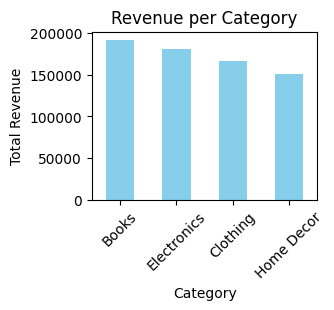

In [14]:
# Revenue per category
plt.subplot(2, 2, 1)
revenue_per_category.plot(kind='bar', color='skyblue', title='Revenue per Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ActiveWear Smartwatch'),
  Text(1, 0, 'SoundWave Headphones'),
  Text(2, 0, 'SoundWave Novel'),
  Text(3, 0, 'ActiveWear Jacket'),
  Text(4, 0, 'ActiveWear Rug')])

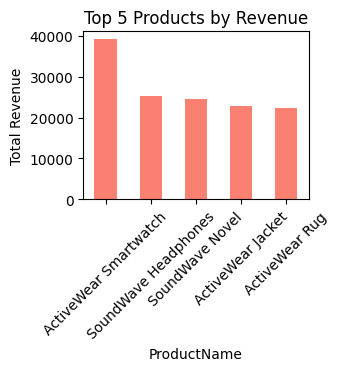

In [15]:
# Top 5 products by revenue
plt.subplot(2, 2, 2)
top_products_by_revenue.plot(kind='bar', color='salmon', title='Top 5 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'South America')])

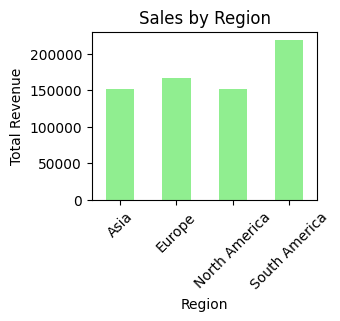

In [16]:
# Sales by region
plt.subplot(2, 2, 3)
sales_by_region.plot(kind='bar', color='lightgreen', title='Sales by Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

Text(0, 0.5, 'Total Revenue')

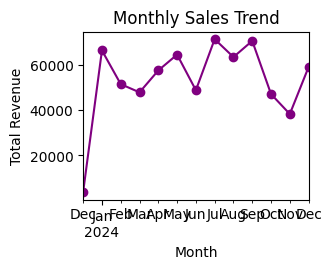

In [17]:
# Monthly sales trend
plt.subplot(2, 2, 4)
monthly_sales.plot(kind='line', marker='o', color='purple', title='Monthly Sales Trend')
plt.ylabel('Total Revenue')


In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
# Printing key insights for reference
print("Key Insights:")
print("1. Revenue per category:")
print(revenue_per_category)
print("\n2. Top 5 products by revenue:")
print(top_products_by_revenue)
print("\n3. Sales by region:")
print(sales_by_region)
print("\n4. Monthly sales trend:")
print(monthly_sales)
print("\n5. Customer growth by signup year:")
print(customers_by_signup_year)

Key Insights:
1. Revenue per category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

2. Top 5 products by revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

3. Sales by region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

4. Monthly sales trend:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

5. Customer growth by signup year:
SignupYear
2022    64
2023    56
20